## Mount Drive and Libraries 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kmodes
!pip install xgboost
!pip install lightgbm
!pip install mlxtend
!pip install Boruta
!pip install catboost
!pip install lightgbm
%pip install mlxtend --upgrade
#################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
from kmodes.kmodes import KModes
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.datasets import make_blobs
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
import copy
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocessing and Feature Selection

Target Variable
1 = 1,319 AD patients
2 = 1,555 control
3 = other
4 = 792 MCI.

In [3]:
def preprocessing(data):
  """
  This function drops columns with more than 60% NAs or no relation to alzheimers.
  Input: raw dataframe
  Output: cleaned dataframe
  """
  #Only retain the data where the patients' samples are analysed with RBM 
  df_with_RBM = data[data['RBM_Rule_Based_Medicine']==1]

  #Drop columns which are not "biomarkers"
  df_biomarkers = df_with_RBM.drop(['STUDYID','PATID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX','CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN',
 'CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
 'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX',
 'A1_MARISTAT','A1_RACE','A1_RACESEC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV',
 'A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR','A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP',
 'A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR','A41_PMBSU',
 'A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA',
 'A43_ADAENDMO','A43_ADAENDYR','A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR',
 'A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO','A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT',
 'A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA','A43_ADCENDMO','A43_ADCENDYR',
 'A43_ADCF', 'A43_ADCFU', 'A43_ADCPREV', 'A43_ADCRT', 'A43_ADCS', 'A43_ADCSTDA', 'A43_ADCSTMO',
 'A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT','A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT',
 'A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT','A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR',
 'A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF','A43_ADFCONT',
 'A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR',
 'A43_ADFSU','A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA',
 'A44_SSASTMO','A44_SSASTYR','A44_SSASU','A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO',
 'A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU','A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR',
 'A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT','A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU',
 'A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO','A44_SSESTYR','A44_SSESU','A44_SSF',
 'A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU','A5_ABUSOTHR','A5_ABUSX',
 'A5_ALCOHOL','A5_ARTHRITIC','A5_AUTOIMM','A5_B12DEF','A5_CANCER','A5_CBOTHR','A5_CBOTHRX','A5_CBSTROKE','A5_CBTIA','A5_CHRON_OTH','A5_CHRON_OTHX',
 'A5_CVAFIB', 'A5_CVANGIO','A5_CVBYPASS','A5_CVCHF','A5_CVHATT','A5_CVOTHR','A5_CVOTHRX','A5_CVPACE','A5_DEP2YRS','A5_DEPOTHR','A5_DIABETES',
 'A5_HYPERCHO','A5_HYPERTEN','A5_IBD','A5_INCONTF','A5_INCONTU','A5_NCOTHR','A5_NCOTHRX','A5_PACKSPER','A5_PD','A5_PDOTHR','A5_PDOTHRYR',
 'A5_PDYR','A5_PSYCDIS','A5_PSYCDISX','A5_QUITSMOK','A5_SEIZURES','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR',
 'A5_STROK5YR','A5_STROK6YR','A5_THYROID','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30',
 'A5_TOBACLSTYR','A5_TRAUMBRF','A5_TRAUMCHR','A5_TRAUMEXT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
 'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DEL','B5_DELSEV','B5_HALL','B5_HALLSEV','B5_AGIT','B5_AGITSEV','B5_DEPD','B5_DEPDSEV',
 'B5_ANX','B5_ANXSEV','B5_ELAT','B5_ELATSEV','B5_APA','B5_APASEV','B5_DISN','B5_DISNSEV','B5_IRR','B5_IRRSEV','B5_MOT','B5_MOTSEV','B5_NITE',
 'B5_NITESEV','B5_APP','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
 'C1_CDROR','C1_CDRPER','C1_CDRSUM', 'C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT', 'C1_CERAD_WR_DISCRIM',
 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES', 'C1_CLOCK', 'C1_CLOX1', 'C1_CLOX2', 'C1_FAS_A', 'C1_FAS_F', 'C1_FAS_S', 'C1_GDS15', 'C1_GDS30', 'C1_LITPROB',
 'C1_MMSE', 'C1_SS_AMNART', 'C1_SS_BOSTON60', 'C1_SS_COMBINED_DIGTOT', 'C1_SS_COMBINED_LM_I', 'C1_SS_COMBINED_LM_II', 'C1_SS_COMBINED_VR_I',
 'C1_SS_COMBINED_VR_II', 'C1_SS_COWAT', 'C1_SS_TRAILA', 'C1_SS_TRAILB', 'C1_SS_WAIS3_DIGTOT', 'C1_SS_WAISR_DIGTOT', 'C1_SS_WMS3_LM_I',
 'C1_SS_WMS3_LM_II', 'C1_SS_WMS3_VR_I', 'C1_SS_WMS3_VR_II', 'C1_SS_WMSR_DIGTOT', 'C1_SS_WMSR_LM_I', 'C1_SS_WMSR_LM_II','C1_SS_WMSR_VR_I',
 'C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA', 'C1_TRAILAERR', 'C1_TRAILB',
 'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF',
 'C1_WAISR_DIGILB','C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1',
 'C1_WMS3_STORY1B2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B','C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E',
 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E', 'C1_WMS3_VRI', 'C1_WMS3_VRII', 'C1_WMSR_DIGIB',
 'C1_WMSR_DIGIF', 'C1_WMSR_DIGILB', 'C1_WMSR_DIGILF', 'C1_WMSR_DIGTOT', 'C1_WMSR_LMEM1', 'C1_WMSR_LMEM2', 'C1_WMSR_STORY1A', 'C1_WMSR_STORY1B1',
 'C1_WMSR_STORY2A', 'C1_WMSR_STORY2B', 'C1_WMSR_VR_A', 'C1_WMSR_VR_B', 'C1_WMSR_VR_C', 'C1_WMSR_VR_D', 'C1_WMSR_VR2_A', 'C1_WMSR_VR2_B',
 'C1_WMSR_VR2_C', 'C1_WMSR_VR2_D', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'D1_ALCDEM', 'D1_ALCDEMIF', 'D1_BRNINJ', 'D1_BRNINJIF', 'D1_COGOTH', 'D1_COGOTHIF',
 'D1_COGOTHX', 'D1_CORT', 'D1_CORTIF', 'D1_DEMENTED', 'D1_DEMUN', 'D1_DEMUNIF', 'D1_DEP', 'D1_DEPIF', 'D1_DLB', 'D1_DLBIF', 'D1_DOWNS',
 'D1_DOWNSIF', 'D1_DYSILL', 'D1_DYSILLIF', 'D1_FTD', 'D1_FTDIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_HYCEPH', 'D1_HYCEPHIF', 'D1_IMPNOMCI',
 'D1_MCIAMEM', 'D1_MCIAPATT', 'D1_MCIAPEX', 'D1_MCIAPLAN', 'D1_MCIAPLUS', 'D1_MCIAPVIS', 'D1_MCIN1ATT', 'D1_MCIN1EX', 'D1_MCIN1LAN', 'D1_MCIN1VIS',
 'D1_MCIN2ATT', 'D1_MCIN2EX', 'D1_MCIN2LAN', 'D1_MCIN2VIS', 'D1_MCINON1', 'D1_MCINON2', 'D1_MEDS', 'D1_MEDSIF', 'D1_NEOP', 'D1_NEOPIF',
 'D1_NORMCOG', 'D1_OTHPSY', 'D1_OTHPSYIF', 'D1_PARK', 'D1_PARKIF', 'D1_PNAPH', 'D1_POS_VASC', 'D1_POS_VASCIF', 'D1_POSSAD', 'D1_POSSADIF',
 'D1_PPAOTHR', 'D1_PPAPH', 'D1_PPAPHIF', 'D1_PRION','D1_PRIONIF', 'D1_PROBAD', 'D1_PROBADIF', 'D1_PSP', 'D1_PSPIF', 'D1_SEMDEMAG', 'D1_SEMDEMAN',
 'D1_STROKE', 'D1_STROKEIF', 'D1_VASC', 'D1_VASCIF', 'D1_WHODIDDX', 'E1_RESIDE_DAT', 'P1_BDATEENROLLX', 'P1_DNACOLLECTED', 'P1_DNATYPE',
 'P1_INBIOMARKER', 'P1_INGENETICS', 'X1_ANGINA_SR', 'X1_ARRHY_SR', 'X1_ATRIAL_SR', 'X1_BMIGT30', 'X1_CHF_SR', 'X1_HYPER_HAS', 'X1_HYPERLIP_HAS',
 'X1_HYPERLIP_SR', 'X1_MI_SR', 'X1_OBESE_AB', 'X1_OBESE_IS', 'X1_OBESE_OTHX', 'X1_SMOKE_CUR', 'X1_SMOKE_EVER', 'X2_IDURM', 'X2_IDURY', 'X2_MRDURM',
 'X2_MRDURY', 'X2_PHYEST', 'X2_PHYESTFIRM', 'PID', 'RBM_Rule_Based_Medicine_tp', 'RBM_Batch', 'RBM_TARC_PID', 'Q1_Quanterix', 'Q1_Quanterix_tp',
 'Q1_YKL_40', 'Q1_GFAP', 'Q1_NFL', 'Q1_Total_tau', 'Q1_UCHL1', 'Q1_CD14', 'E1_DIED', 'E1_EXITDATEX', 'E1_LOST', 'E1_RESIDE_CARE', 'E1_WDOTHREAS',
 'E1_WDOTHREASX', 'E1_WITHDREW', 'F1_PSMS1', 'F1_PSMS2', 'F1_PSMS3', 'F1_PSMS4', 'F1_PSMS5', 'F1_PSMS6', 'F1_PSMSTOTSCR', 'F2_IADL1',
 'F2_IADL2', 'F2_IADL3', 'F2_IADL4', 'F2_IADL5', 'F2_IADL6', 'F2_IADL7', 'F2_IADL8', 'F2_IADLTOTSCR', 'I1_INBIRYR', 'I1_INCALLS', 'I1_INDATECONTX',
 'I1_INEDUC', 'I1_INHISP', 'I1_INHISPOR', 'I1_INHISPOX', 'I1_INHOWCONTACT', 'I1_INLIVWTH', 'I1_INRACE', 'I1_INRACEX', 'I1_INRASEC', 'I1_INRASECX',
 'I1_INRATER', 'I1_INRATERX', 'I1_INRELTO', 'I1_INRELTOX', 'I1_INRELY', 'I1_INSEX', 'I1_INVISITS', 'I1_ISNEWINFORM', 'P1_BIOSERUM', 'P1_BUFFY',
 'P1_CSF', 'P1_DATEDRAWX', 'P1_DATEFOODX','P1_DATESTICKX', 'P1_GDATEENROLLX', 'P1_HRSAFTFOOT', 'P1_PLASMA', 'P1_PT_TYPE_OTHX', 'P1_PTTYPEDESC',
 'P1_SERUM', 'P1_SHARE_AGREE', 'P1_SHARE_DATEX', 'P1_TIMEDRAWX','P1_TIMEFOODX', 'P1_TIMESTICKX', 'P1_WHOLEBLOOD', 'P1_WHYNOTALL', 'P1_WHYNOTALLX',
 'RBM_Rule_Based_Medicine', 'A1_RESIDENC', 'GWAS'], axis=1)
  
  #replacing empty strings(missing vals) with NaN values
  df_biomarkers = df_biomarkers.replace(r'^\s*$', np.nan, regex=True)

  #fill NaN vals as -9
  nullvals=list(df_biomarkers.isna().sum()[df_biomarkers.isna().sum()>0].index)
  df_biomarkers[nullvals]=df_biomarkers[nullvals].fillna(-9)

  #onehot encoding for APOE_GENOTYPE feature
  one_hot_encoded = pd.get_dummies(df_biomarkers.APOE_GENOTYPE)  
  merged_df = pd.concat([df_biomarkers, one_hot_encoded],axis=1)  
  df_biomarkers = merged_df.drop(['APOE_GENOTYPE'], axis=1)

  #removing the onehot encoded feature of missing vals
  df_biomarkers = df_biomarkers.drop([-9], axis=1)

  #convert categorical object columns to floats
  categoricalcols=list(df_biomarkers.dtypes[df_biomarkers.dtypes==object].index)
  df_biomarkers[categoricalcols]=df_biomarkers[categoricalcols].astype(float)
  
  #removing rows which contain missing vals in all RBM features
  all_cols = df_biomarkers.columns
  regex_rbm = re.compile("^RBM_.*$")
  rbm_cols = list(filter(regex_rbm.match, all_cols))
  df_biomarkers = df_biomarkers[df_biomarkers[rbm_cols].apply(pd.Series.nunique, axis=1) > 1]

  #removing the 2 rows where diagnosis is MCI/Other
  df_biomarkers = df_biomarkers[df_biomarkers['P1_PT_TYPE'].isin([1,2])]

  return df_biomarkers

In [4]:
# non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
# df = preprocessing(non_genetic_df)

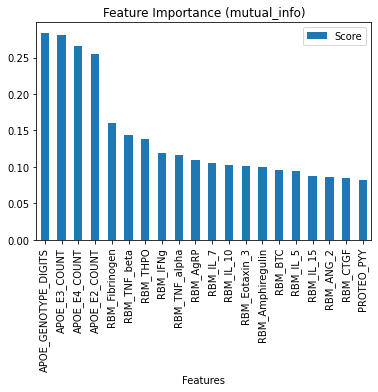

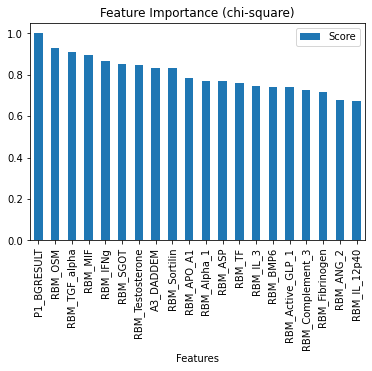

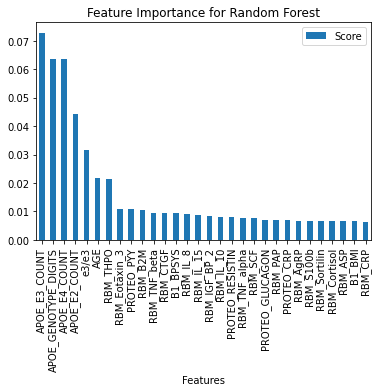

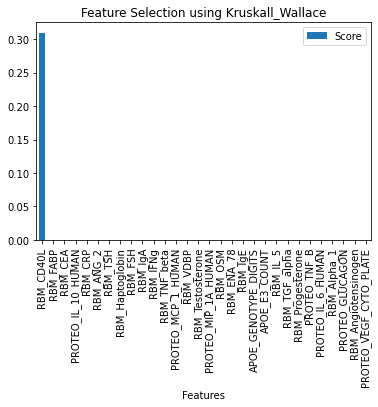

In [5]:
# import preprocessing1 as pp
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
# from sklearn import externals
# import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pyparsing import printables

### Load data
data = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)

df = preprocessing(data)

##### Split features and target variable #####
X = df.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df['P1_PT_TYPE']


def find_features(model, features, score):
    """
    This function lists and plots the top features
    """
    dict = {'Features':features,'Score':score}
    df=pd.DataFrame(dict)
    df=df.sort_values(by='Score', ascending=False)
    df=df[:20]
    df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance ({model})')
    plt.savefig(f'{model}_features.pdf', format="pdf", bbox_inches="tight")
    plot = plt.show()
    return df, plot


def random_forest_select(X,y):
    """
    This function lists and plots random forest feature selection
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    
    #Standard Scaling
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    Xcols=list(X.columns)
    X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
    X_test_std=pd.DataFrame(X_test_std, columns=Xcols)
    
    #Fitting the model
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train_std, y_train.values.ravel())
    
    #RF Score
    rf_score=forest.feature_importances_.tolist()

    #RF Features
    rf_features=list(X.columns)

    rf_dict = {'Features':rf_features,'Score':rf_score}
    rf_df=pd.DataFrame(rf_dict)
    rf_df=rf_df.sort_values(by='Score', ascending=False)
    rf_df=rf_df.head(30)
    rf_df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for Random Forest')
    plt.savefig("RandomForest_features.pdf", format="pdf", bbox_inches="tight")
    rf_plot = plt.show()
    return rf_df, rf_plot


def recursive_selection(rfe, X, y):
    """
    This function lists recursive feature selection
    """
    rfs=rfe.fit(X, y)
    #RFS Features
    rfs_features= list(X.columns)
    #RFS Scores
    rfs_score= rfs.support_.tolist()
    rfs_dict = {'Features':rfs_features,'Score':rfs_score}
    rfs_df= pd.DataFrame.from_dict(rfs_dict)
    rfs_df=rfs_df.loc[rfs_df['Score'] == True]
    return rfs_df


def fb_selection(model, direction_name, direction):
    """
    This function lists and plots forward or backward feature selection 
    """
    ff1 = sfs(model, k_features=30, forward=direction, verbose=2, scoring='accuracy')
    ff1 = ff1.fit(X,y)
    ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
    ff1_df = pd.DataFrame.from_dict(ff1_dict).T
    fig1=plot_sfs(ff1_dict, kind='ci')
    plt.title(f'{direction_name} Feature Selection using {model} (With confidence interval)')
    plt.savefig(f'{model}_features.pdf', format="pdf", bbox_inches="tight")
    plt.grid()
    plot = plt.show()
    ff1_features=list(ff1_df['feature_names'][30])
    return ff1_features, fig1, plot


def kruskal_select(X, y):
    kruskal_features = []
    kruskal_scores = []
    for col in X.columns:
        feature = X[col]

        result = stats.kruskal(list(feature), list(y))
        
        # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
        if result.pvalue > 0:
            kruskal_features.append(col)
            kruskal_scores.append(result.pvalue)
    
    # print(kruskal_features, kruskal_scores)
    kruskal_features= pd.DataFrame(kruskal_features)
    kruskal_scores= pd.DataFrame(kruskal_scores)
    kruskal_df= pd.concat([kruskal_features, kruskal_scores], axis=1)
    kruskal_df.columns = ['Features', 'Score']
    kruskal_df = kruskal_df.sort_values(by='Score', ascending=False)
    kruskal_df.iloc[:30, :]
    kruskal_df.iloc[:30,:].plot.bar(x='Features',y='Score')
    plt.title('Feature Selection using Kruskall_Wallace')
    plt.savefig("Kruskall_features.pdf", format="pdf", bbox_inches="tight")
    kw_plot = plt.show()
    return kruskal_df, kw_plot



##### Combining all methods #####
features=[]
def combine_features():
    features=list(mi_df['Features'])+list(chi_df['Features'])+list(rf_df['Features'])+list(rfr_df['Features'])+list(dtr_df['Features'])+list(kruskal_df['Features'])
    features=pd.DataFrame(features).reset_index(drop=True)
    features.columns = ['Features']
    counts = features['Features'].value_counts().to_frame().reset_index()
    counts.columns=['Features','Frequency']
    combined_features=counts.head(28)
    combined_feature_list=list(counts['Features'])

    return combined_feature_list



###### Mann- Whitney ######
# cant get this to run
#mw=stats.mannwhitneyu(X, y, alternative = 'two-sided')
#Choosing significant features
#lst=np.where(mw.pvalue>0)[0].tolist()
#Mann Whitney Feature Columns
#mw_features=list(df.columns[lst])
#Mann Whitney Column P values
#mw_score=list(mw.pvalue[mw.pvalue>0])
#mw_df, mw_plot = find_features('mann-whitney', mw_features, mw_score)

###### Mutual Info ######

mi= MIC(X,y)
#Mutual Info Features
mi_cols=list(X.columns)
#Mutual Info Scores
mi_score=mi.tolist()
mi_df, mi_plot = find_features('mutual_info', mi_cols,mi_score)

###### Chi-Square ######

df2=df
df2[df2<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99
X1 = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y1 = df2['P1_PT_TYPE']
chi = chi2(X1,y1)
#Chi Test Score
chi_score=chi[1].tolist()
# #Chi Test Features
chi_features=list(X1)
chi_df, chi_plot = find_features('chi-square', chi_features, chi_score)

###### Random Forest ######

rf_df, rf_plot = random_forest_select(X,y)

###### Recursive Selections ######
rfr = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
rfr_df = recursive_selection(rfr, X, y)

dtr = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
dtr_df = recursive_selection(dtr, X, y)

###### Forward and Backward selection ######
# these take so long to run
#dtf_df, dtf_fig, dtf_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Forward', direction = True)
#rff_df, rff_fig, rff_plot =fb_selection(model = RandomForestClassifier(), direction_name = 'Forward', direction = True)

#lrb_df, lrb_fig, lrb_plot = fb_selection(model = LogisticRegression(), direction_name = 'Backward', direction = False)
#dtb_df, dtb_fig, dtb_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Backward', direction = False)

############ Kruskal-Wallis #############

kruskal_df, kw_plot = kruskal_select(X,y)


In [6]:
# combined_features = combine_features()
# combined_features_list = combined_features['Features'].to_list()

In [7]:
# combined_features_list

In [8]:
# final_features_df = df[combined_features_list]

In [9]:
# final_features_df

In [10]:
# merge the dataset for machine learning model
# frames = [final_features_df, y]

# final_df = pd.concat(frames, axis=1)

In [11]:
# final_df

## Modeling and Evaluation

In [15]:
def ml_prep(final_df):
  
  features = final_df.loc[:, final_df.columns != 'P1_PT_TYPE']
  y = final_df['P1_PT_TYPE']

  # standard scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(features)

  # train_test_split (80/20)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  return X_train, X_test, y_train, y_test


In [16]:
def results(df, X_train, X_test, y_train, y_test, classifier_func, model_name):

    # perform evaluation on various models

    for model in range(len(classifier_func[:])):
      classifier_func[model].fit(X_train, y_train)

      print('-'*150)
      print(f'Evaluation for {model_name[model]}: ')
      y_pred = classifier_func[model].predict(X_test)
      evaluation(y_test, y_pred)
      print('-'*150)
      print()
        
    

In [17]:
# Evaluation metrics
def evaluation(y_test, y_pred):

    # Accuracy classification score
    score = round(accuracy_score(y_test, y_pred), 4)
    print(f'Accuracy Score: {score*100}%')
    print()
    
    # Macro averaged precision: calculate precision for all classes individually and then average them
    macro_averaged_precision = precision_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged Precision score: {:.4f}".format(macro_averaged_precision))

    # Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
    micro_averaged_precision = precision_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged Precision score: {:.4f}".format(micro_averaged_precision))

    # Macro averaged recall: calculate recall for all classes individually and then average them
    macro_averaged_recall = recall_score(y_test, y_pred, average = 'macro')
    print("Macro-averaged recall score: {:.4f}".format(macro_averaged_recall))
    
    # Micro averaged recall: calculate class wise true positive and false negative and then use that to calculate overall recall
    micro_averaged_recall = recall_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged recall score: {:.4f}".format(micro_averaged_recall))

    # Macro averaged F1 Score: calculate f1 score of every class and then average them
    macro_averaged_f1 = f1_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged F1 score: {:.4f}".format(macro_averaged_f1))

    # Micro averaged F1 Score: calculate macro-averaged precision score and macro-averaged recall score and then take there harmonic mean
    micro_averaged_f1 = f1_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged F1 score: {:.4f}".format(micro_averaged_f1))

    # Receiver Operating Characteristic Area Under Curve (ROC_AUC) Score
    roc_auc_bi = roc_auc_score(y_test, y_pred, average = 'macro')
    print("ROC_AUC Score: {:.4f}".format(roc_auc_bi))

    # required to convert labels for auc_precision_recall
    # converted from 1 = AD and 2 = Control to 0 = AD and 1 = Control
    # convert y_test
    prc_y_test = copy.deepcopy(y_test)
    prc_y_test[prc_y_test==1] = 0
    prc_y_test[prc_y_test==2] = 1

    # convert y_pred
    prc_y_pred = copy.deepcopy(y_pred)
    prc_y_pred[prc_y_pred==1] = 0
    prc_y_pred[prc_y_pred==2] = 1

    # Compute Area Under the Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(prc_y_test, prc_y_pred)
    auc_precision_recall = auc(recall, precision)
    print("AUPRC is: {:.4f}".format(auc_precision_recall))

    # Get specificity from classification report
    class_report = classification_report(y_test, y_pred, labels=[1,2])
    print("Classification Report: ")
    print(class_report)

    # plot the confusion matrix
    plt.figure(figsize = (18,8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Note: Use micro-average if classes are imbalance

In [54]:
def main(non_genetic_df):

  # pre-process the raw data
  df = preprocessing(non_genetic_df)

  # target variable
  y = df['P1_PT_TYPE']
  
  # getting top features after feature selection
  combined_feature_list = combine_features()
  final_features_df = df[combined_feature_list]

  # merge the dataset for machine learning model
  frames = [final_features_df, y]
  final_df = pd.concat(frames, axis=1)

  # perform train_test_split
  X_train, X_test, y_train, y_test = ml_prep(final_df)

  # list of classifier functions
  classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42),       
                    XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                    GradientBoostingClassifier(n_estimators=200, max_depth=5), 
                    DecisionTreeClassifier(random_state=None), 
                    LogisticRegression(class_weight='balanced', max_iter=50, random_state=42, solver='saga'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)] 

  # list of classifier names
  model_name= ['Light Gradient Boosting Method', 
               'Random Forest', 
               'eXtreme Gradient Boosting', 
               'Gradient Boosting', 
               'Decision Tree', 
               'Logistic Regression', 
               'Extra Trees',
               'Categorical Boosting']

  # evaluate performance and feature importance for each algorithm
  results(final_df, X_train, X_test, y_train, y_test, classifier_func, model_name)

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Light Gradient Boosting Method: 
Accuracy Score: 87.39%

Macro-Averaged Precision score: 0.8710
Micro-Averaged Precision score: 0.8739
Macro-averaged recall score: 0.8775
Micro-Averaged recall score: 0.8739
Macro-Averaged F1 score: 0.8727
Micro-Averaged F1 score: 0.8739
ROC_AUC Score: 0.8775
AUPRC is: 0.9288
Classification Report: 
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        51
           2       0.92      0.85      0.89        68

    accuracy                           0.87       119
   macro avg       0.87      0.88      0.87       119
weighted avg       0.88      0.87      0.87       119



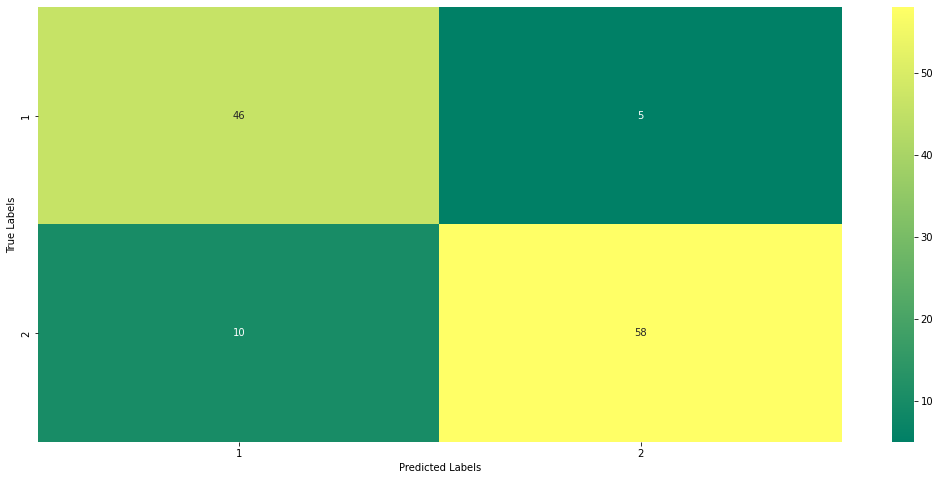

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 88.24%

Macro-Averaged Precision score: 0.8816
Micro-Averaged Precision score: 0.8824
Macro-averaged recall score: 0.8775
Micro-Averaged recall score: 0.8824
Macro-Averaged F1 score: 0.8793
Micro-Averaged F1 score: 0.8824
ROC_AUC Score: 0.8775
AUPRC is: 0.9239
Classification Report: 
              precision    recall  f1-score   support

           1       0.88      0.84      0.86        51
           2       0.89      0.91      0.90        68

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119



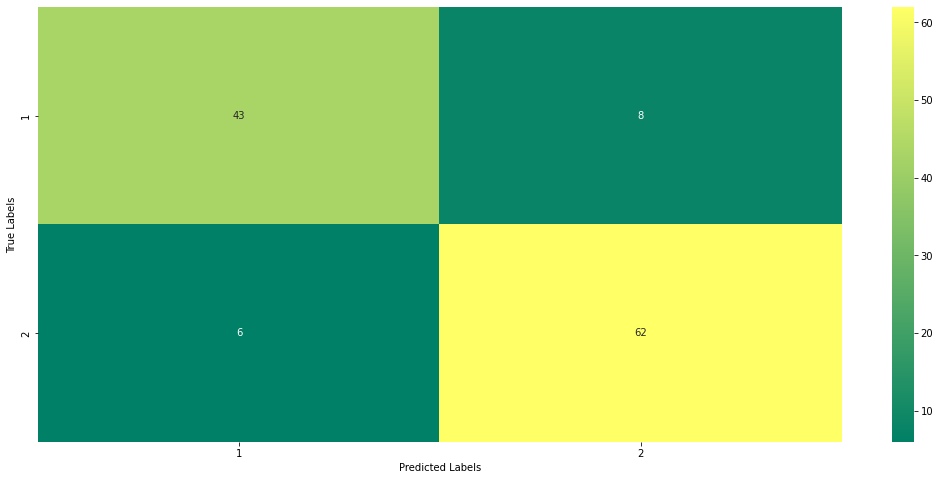

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 88.24%

Macro-Averaged Precision score: 0.8791
Micro-Averaged Precision score: 0.8824
Macro-averaged recall score: 0.8848
Micro-Averaged recall score: 0.8824
Macro-Averaged F1 score: 0.8809
Micro-Averaged F1 score: 0.8824
ROC_AUC Score: 0.8848
AUPRC is: 0.9326
Classification Report: 
              precision    recall  f1-score   support

           1       0.84      0.90      0.87        51
           2       0.92      0.87      0.89        68

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.89      0.88      0.88       119



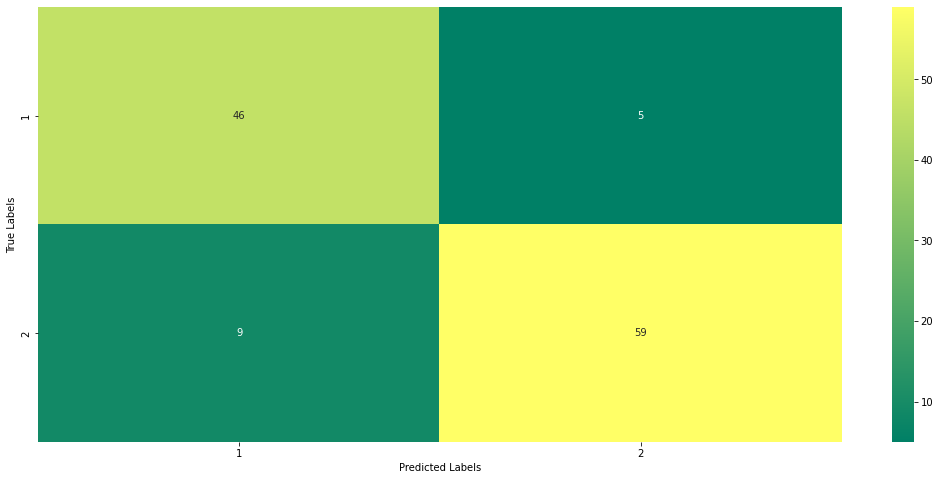

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 84.87%

Macro-Averaged Precision score: 0.8456
Micro-Averaged Precision score: 0.8487
Macro-averaged recall score: 0.8456
Micro-Averaged recall score: 0.8487
Macro-Averaged F1 score: 0.8456
Micro-Averaged F1 score: 0.8487
ROC_AUC Score: 0.8456
AUPRC is: 0.9055
Classification Report: 
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        51
           2       0.87      0.87      0.87        68

    accuracy                           0.85       119
   macro avg       0.85      0.85      0.85       119
weighted avg       0.85      0.85      0.85       119



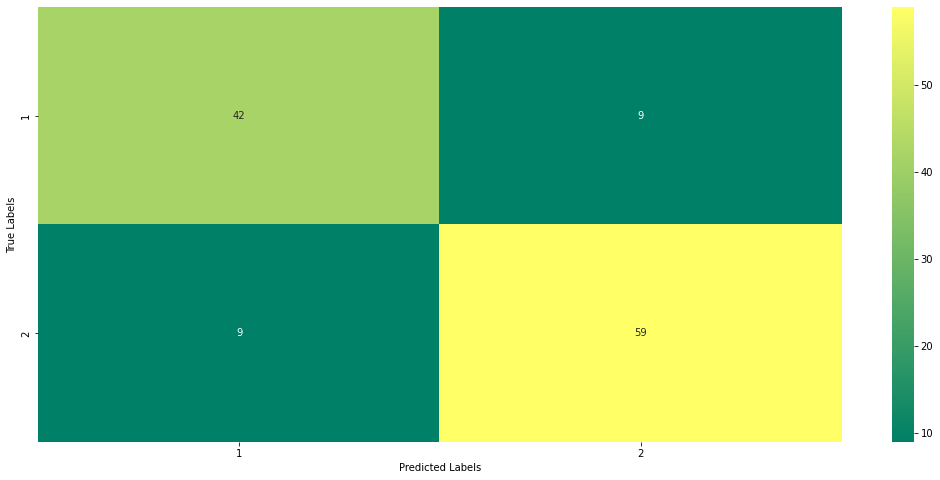

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 70.59%

Macro-Averaged Precision score: 0.7093
Micro-Averaged Precision score: 0.7059
Macro-averaged recall score: 0.7132
Micro-Averaged recall score: 0.7059
Macro-Averaged F1 score: 0.7051
Micro-Averaged F1 score: 0.7059
ROC_AUC Score: 0.7132
AUPRC is: 0.8223
Classification Report: 
              precision    recall  f1-score   support

           1       0.63      0.76      0.69        51
           2       0.79      0.66      0.72        68

    accuracy                           0.71       119
   macro avg       0.71      0.71      0.71       119
weighted avg       0.72      0.71      0.71       119



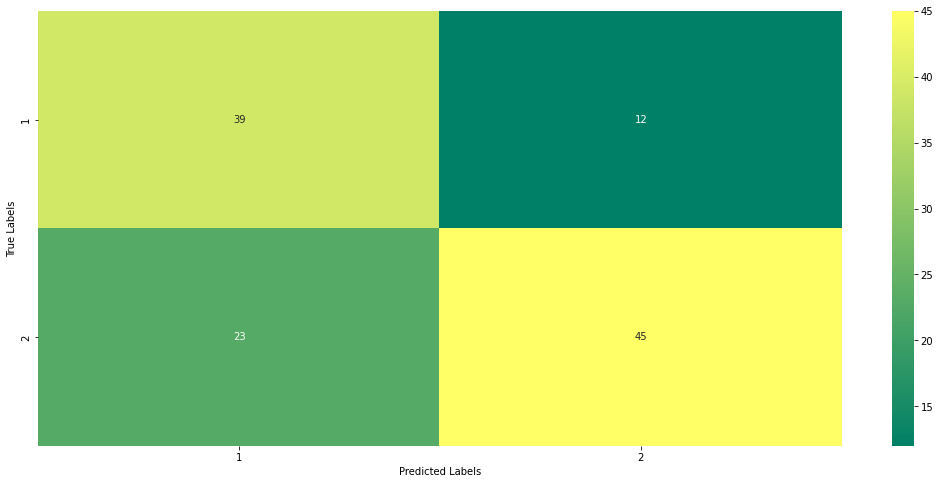

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 86.55000000000001%

Macro-Averaged Precision score: 0.8632
Micro-Averaged Precision score: 0.8655
Macro-averaged recall score: 0.8701
Micro-Averaged recall score: 0.8655
Macro-Averaged F1 score: 0.8644
Micro-Averaged F1 score: 0.8655
ROC_AUC Score: 0.8701
AUPRC is: 0.9250
Classification Report: 
              precision    recall  f1-score   support

           1       0.81      0.90      0.85        51
           2       0.92      0.84      0.88        68

    accuracy                           0.87       119
   macro avg       0.86      0.87      0.86       119
weighted avg       0.87      0.87      0.87       119



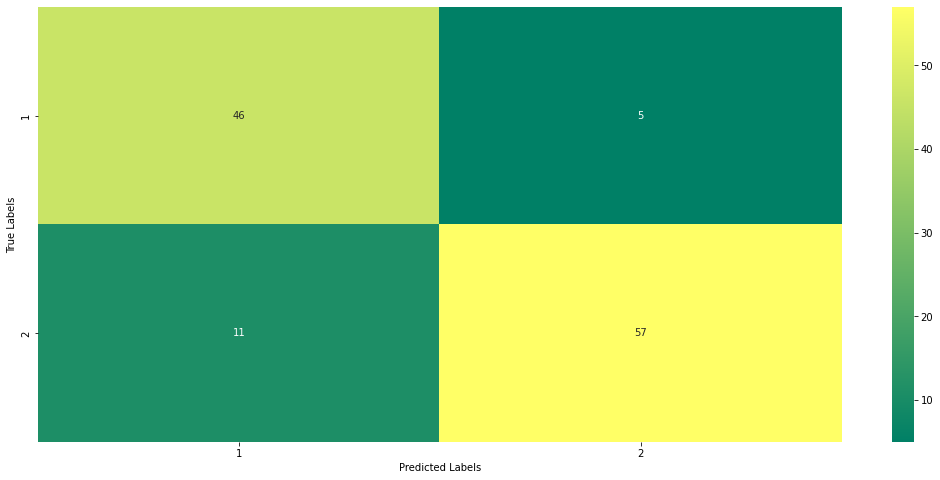

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 83.19%

Macro-Averaged Precision score: 0.8429
Micro-Averaged Precision score: 0.8319
Macro-averaged recall score: 0.8162
Micro-Averaged recall score: 0.8319
Macro-Averaged F1 score: 0.8228
Micro-Averaged F1 score: 0.8319
ROC_AUC Score: 0.8162
AUPRC is: 0.8881
Classification Report: 
              precision    recall  f1-score   support

           1       0.88      0.71      0.78        51
           2       0.81      0.93      0.86        68

    accuracy                           0.83       119
   macro avg       0.84      0.82      0.82       119
weighted avg       0.84      0.83      0.83       119



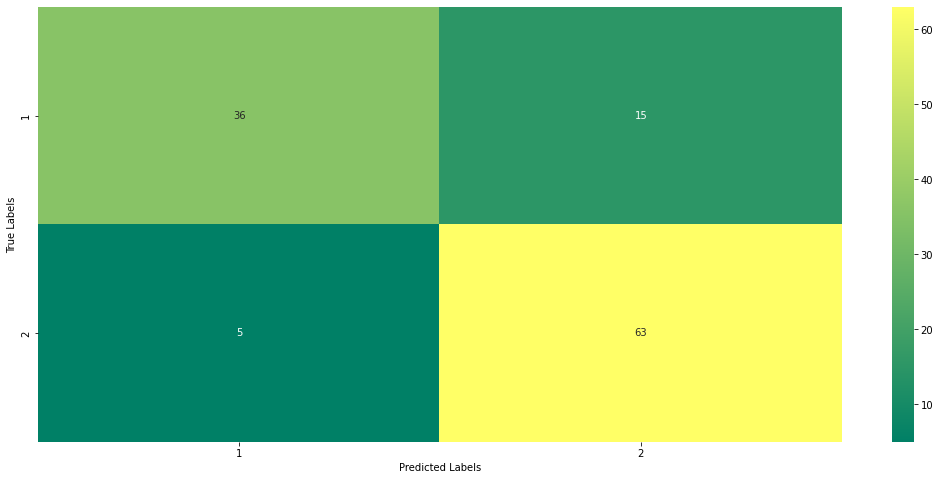

------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.00749
0:	learn: 0.6875514	total: 39.2ms	remaining: 39.2s
1:	learn: 0.6815360	total: 82ms	remaining: 40.9s
2:	learn: 0.6755206	total: 111ms	remaining: 37s
3:	learn: 0.6681695	total: 142ms	remaining: 35.5s
4:	learn: 0.6626621	total: 175ms	remaining: 34.8s
5:	learn: 0.6572041	total: 208ms	remaining: 34.4s
6:	learn: 0.6513397	total: 238ms	remaining: 33.8s
7:	learn: 0.6461315	total: 268ms	remaining: 33.2s
8:	learn: 0.6409314	total: 300ms	remaining: 33.1s
9:	learn: 0.6351366	total: 330ms	remaining: 32.7s
10:	learn: 0.6300510	total: 359ms	remaining: 32.3s
11:	learn: 0.6245019	total: 393ms	remaining: 32.4s
12:	learn: 0.6198593	total: 423ms	remaining: 32.1s
13:	learn: 0.6138822	total: 452ms	remaining: 31.9s
14:	learn: 0.6096347	total: 482ms	remaining: 31.6s
15:	learn: 0.6036470	total: 515ms	remaining: 31.7s
16:	learn: 0.59

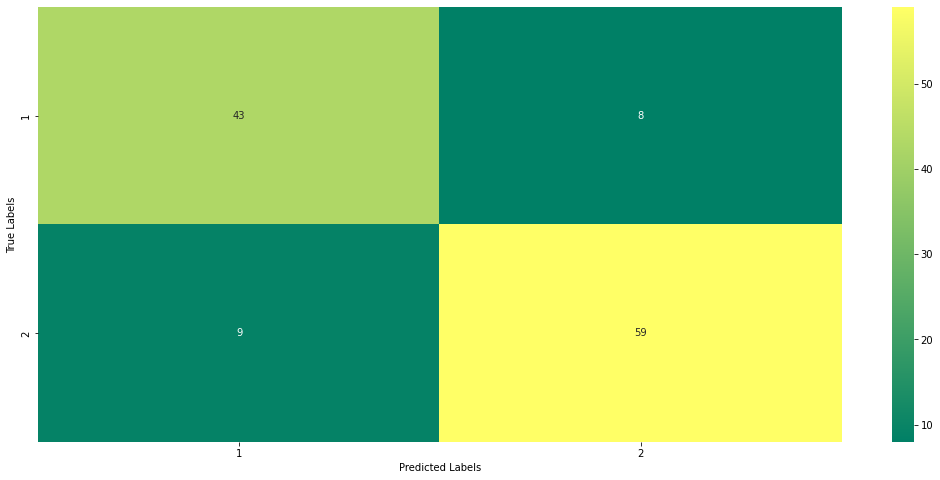

------------------------------------------------------------------------------------------------------------------------------------------------------



In [55]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
main(non_genetic_df)

## Finetuning

In [32]:
df = preprocessing(non_genetic_df)

combined_feature_list = combine_features()

X = df[combined_feature_list]
y = df['P1_PT_TYPE']

# merge the dataset for machine learning model
frames = [X, y]
final_df = pd.concat(frames, axis=1)

X_train, X_test, y_train, y_test = ml_prep(final_df)

In [33]:
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)


In [ ]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.882 params {'n_estimators': 350, 'max_depth': 3}
Gini 0.876 params {'n_estimators': 275, 'max_depth': 3}
Gini 0.881 params {'n_estimators': 100, 'max_depth': 7}
Gini 0.880 params {'n_estimators': 775, 'max_depth': 8}
Gini 0.869 params {'n_estimators': 50, 'max_depth': 3}
Gini 0.872 params {'n_estimators': 275, 'max_depth': 6}
Gini 0.873 params {'n_estimators': 125, 'max_depth': 7}
Gini 0.874 params {'n_estimators': 450, 'max_depth': 10}
Gini 0.880 params {'n_estimators': 75, 'max_depth': 4}
Gini 0.877 params {'n_estimators': 650, 'max_depth': 8}
100%|██████████| 10/10 [00:43<00:00,  4.39s/it, best loss: 0.8694401261954054]
Hyperopt estimated optimum {'max_depth': 3.0, 'n_estimators': 50.0}


In [46]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))


Gini 0.876 params {'max_depth': 3, 'gamma': '0.116', 'colsample_bytree': '0.572'}
Gini 0.872 params {'max_depth': 3, 'gamma': '0.189', 'colsample_bytree': '0.981'}
Gini 0.888 params {'max_depth': 6, 'gamma': '0.283', 'colsample_bytree': '0.454'}
Gini 0.883 params {'max_depth': 6, 'gamma': '0.310', 'colsample_bytree': '0.733'}
Gini 0.883 params {'max_depth': 5, 'gamma': '0.113', 'colsample_bytree': '0.318'}
Gini 0.873 params {'max_depth': 3, 'gamma': '0.415', 'colsample_bytree': '0.745'}
Gini 0.863 params {'max_depth': 4, 'gamma': '0.313', 'colsample_bytree': '0.933'}
Gini 0.887 params {'max_depth': 7, 'gamma': '0.271', 'colsample_bytree': '0.476'}
Gini 0.873 params {'max_depth': 3, 'gamma': '0.197', 'colsample_bytree': '0.871'}
Gini 0.883 params {'max_depth': 7, 'gamma': '0.352', 'colsample_bytree': '0.512'}
100%|██████████| 10/10 [00:49<00:00,  4.96s/it, best loss: 0.862701133786848]
Hyperopt estimated optimum {'colsample_bytree': 0.9329339997795421, 'gamma': 0.3133514583418693, 'max_

In [37]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.885 params {'num_leaves': 24, 'colsample_bytree': '0.639'}
Gini 0.881 params {'num_leaves': 42, 'colsample_bytree': '0.745'}
Gini 0.878 params {'num_leaves': 122, 'colsample_bytree': '0.874'}
Gini 0.884 params {'num_leaves': 20, 'colsample_bytree': '0.654'}
Gini 0.882 params {'num_leaves': 96, 'colsample_bytree': '0.947'}
Gini 0.889 params {'num_leaves': 124, 'colsample_bytree': '0.316'}
Gini 0.884 params {'num_leaves': 48, 'colsample_bytree': '0.709'}
Gini 0.881 params {'num_leaves': 72, 'colsample_bytree': '0.725'}
Gini 0.893 params {'num_leaves': 24, 'colsample_bytree': '0.454'}
Gini 0.887 params {'num_leaves': 64, 'colsample_bytree': '0.509'}
100%|██████████| 10/10 [01:06<00:00,  6.62s/it, best loss: 0.8780098984521345]
Hyperopt estimated optimum {'colsample_bytree': 0.8738950140874173, 'num_leaves': 122.0}


In [43]:
from hyperopt import hp, fmin, tpe, Trials
lgb_class_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth', np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.3,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves', np.arange(8, 200, 2, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     5
}
def objective(params):
  lgbm_clf = lgbm.LGBMClassifier(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm_clf, X_train, y_train, cv=StratifiedKFold(),n_jobs=-1).mean() #scoring=gini_scorer
  print("Gini {:.3f} params {}".format(score, params))
  return score

trials = Trials()
best_result = fmin(
    fn=objective,                          
    space=lgb_class_params,   
    algo=tpe.suggest,              
    max_evals=50,                  
    trials=trials                   
)

print("Hyperopt estimated optimum {}".format(best_result))

Gini 0.751 params {'colsample_bytree': 0.7274038459018122, 'learning_rate': 0.21301401719062718, 'max_depth': 69, 'min_child_weight': 40, 'min_split_gain': 0.6235376502283486, 'n_estimators': 5, 'num_leaves': 44, 'reg_alpha': 0.9136542394092612, 'reg_lambda': 0.37412848304974944, 'subsample': 0.7935866427733902}
Gini 0.698 params {'colsample_bytree': 0.8008228978684815, 'learning_rate': 0.17918959112748778, 'max_depth': 83, 'min_child_weight': 42, 'min_split_gain': 0.06918841889782679, 'n_estimators': 5, 'num_leaves': 78, 'reg_alpha': 0.9544610992885535, 'reg_lambda': 0.7461569060835598, 'subsample': 0.8327581832058415}
Gini 0.833 params {'colsample_bytree': 0.32081080557182906, 'learning_rate': 0.40399109231183794, 'max_depth': 90, 'min_child_weight': 28, 'min_split_gain': 0.936401398779995, 'n_estimators': 5, 'num_leaves': 130, 'reg_alpha': 0.9220921507883983, 'reg_lambda': 0.4770804318093036, 'subsample': 0.7582874609690214}
Gini 0.833 params {'colsample_bytree': 0.4278935241709634,

In [ ]:
(colsample_bytree=0.6313906054485746, learning_rate= 0.6506130310387814, max_depth= 25, 
min_child_weight= 47, min_split_gain= 0.9931729184145638, num_leaves=60, 
reg_alpha= 0.6139794583406265, reg_lambda= 0.9273162902729958, subsample= 0.6343484392614323)

GridSearchCV

In [ ]:
# Random forest
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


In [ ]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:

# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': list(range(100,2000,200)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': list(range(1,5,1)),
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

In [ ]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

In [ ]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

In [ ]:
params = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=params, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=50, random_state=42,
                   solver='saga')


In [ ]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, verbose=1, n_jobs=-1)
DT_grid.fit(X_train, y_train)
print(DT_grid.best_estimator_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=42)


In [ ]:
# optimal models
# lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136, num_leaves= 122), 
#RandomForestClassifier(criterion= 'gini', max_depth=6, max_features='auto', n_estimators= 500), 
# XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8)